# 1. Import thư viện

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 2. Đọc ảnh và in ảnh ra màn hình

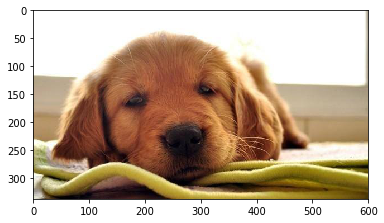

In [7]:
img = cv2.imread('F:\CV\image.jpg') #BGR image, not RGB image

Original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(Original)
plt.show()

# 3. Tăng độ sáng của ảnh thêm 30 đơn vị:

## Thực hiện:
- Sử dụng ma trận: cộng thêm 30 đơn vị vào ma trận ảnh
- Sử dụng vòng lặp for: duyệt qua tất cả các điểm ảnh ̣̣(ở cả 3 layer RGB) và cộng thêm 30 đơn vị cho mỗi điểm ảnh

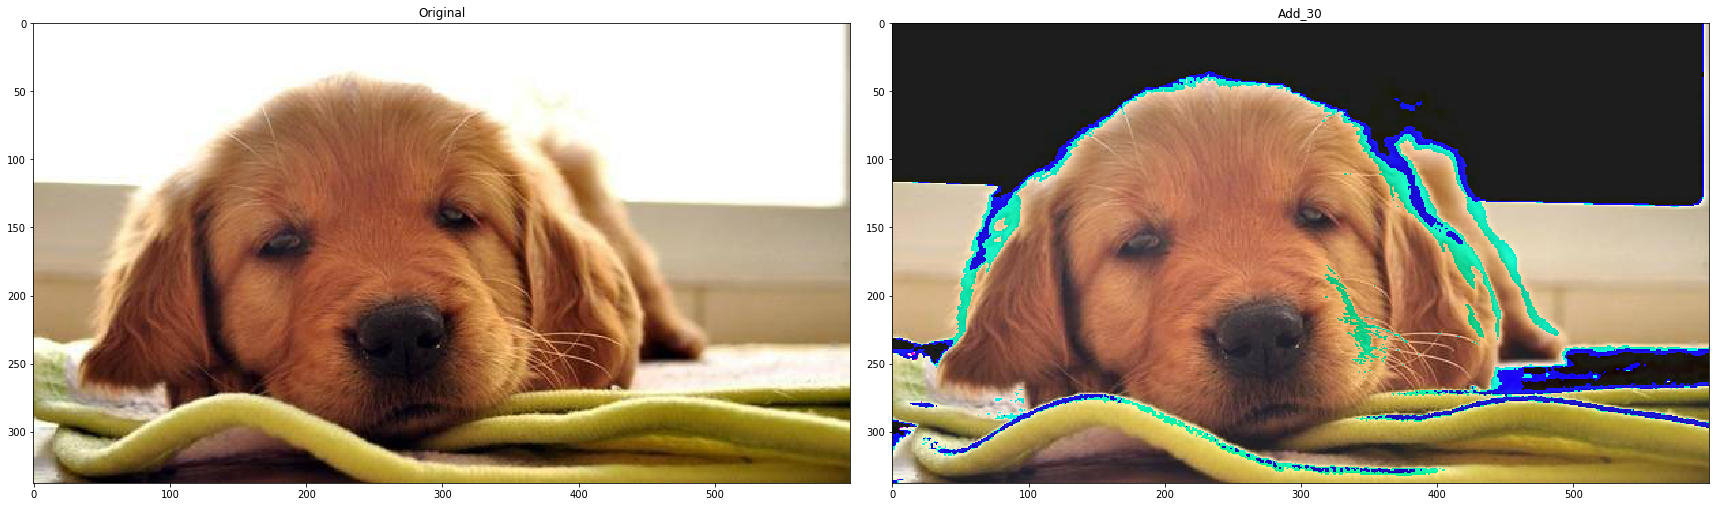

In [8]:
# Using matrix
img_increase_brightness1 = img + 30

# Using loop
def increase_brightness_using_for(img, value):
    img_increase_brightness2 = np.zeros_like(img) 
    for i in range(img.shape[0]): 
        for j in range(img.shape[1]): 
            for k in range(img.shape[2]): 
                img_increase_brightness2[i][j][k] = img[i][j][k] + value
    return img_increase_brightness2

img_increase_brightness2 = increase_brightness_using_for(Original, 30)

# Show result
f, axarray = plt.subplots(1, 2, figsize = (24,9))
f.tight_layout()
axarray[0].set_title('Original')
axarray[0].imshow(Original)
axarray[1].set_title('Add_30')
axarray[1].imshow(img_increase_brightness2)
plt.show()

## Giải thích
- Mô hình màu RGB sử dụng mô hình bổ sung trong đó ánh sáng đỏ, xanh lá cây và xanh lam được tổ hợp với nhau theo nhiều phương thức khác nhau để tạo thành các màu khác.
- Mỗi kênh màu có 256 mức độ từ 0 đến 255 (từ rất tối đến rất sáng).
- Những điểm ảnh khi đã có giá trị cả 3 kênh màu ở khoảng gần 255 sẽ được cộng thêm 30 đơn vị và tuần hoàn lại từ 
    0 (đen); cho nên ở vùng màu trắng trong ảnh, sau khi tăng màu sẽ chuyển thành màu đen.
    VD: pixel A(0,0) có giá trị 3 kênh màu là [250, 250, 250] (màu gần trắng), sau khi cộng thêm 30 sẽ trở thành 
    [24, 24, 24] nên có màu gần đen. Ví dụ:

![Thêm chú thích](https://2.bp.blogspot.com/-XAl0v1Rnnds/XHTQ8DtghlI/AAAAAAAACh0/OO3D92zxCLo2qof74f6NZFvZsa1RoP4DACLcBGAs/s400/%257BC5D29BE5-AD98-42EA-BE31-48EFD2975084%257D.png.jpg)

# 4. Chuyển lần lượt các kênh màu về 0:

## Thực hiện:
- Ma trận: gán giá trị 0 cho tất cả các điểm tại layer màu ta muốn chuyển về 0. 
                imgblue0[:, :, 0] = 0 #layer thứ 0 (blue)
                imggreen0[:, :, 1] = 0 #layer thứ 1 (green)
                imgred0[:, :, 2] = 0 #layer thứ 2 (red)
- Vòng lặp for: duyệt qua tất cả các điểm ảnh, tại layer màu mong muốn, gán bằng giá trị 0.

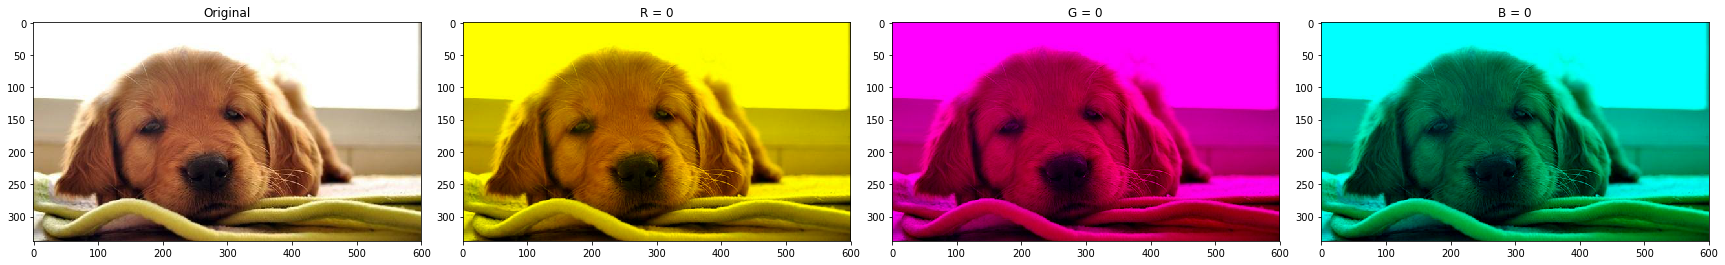

In [9]:
# Using matrix
imgblue0 = img.copy()
imgblue0[:, :, 0] = 0

imggreen0 = img.copy()
imggreen0[:, :, 1] = 0

imgred0 = img.copy()
imgred0[:, :, 2] = 0

# Using Loop
def set_red_is_zero(img):
    imgredis0 = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                if k == 2: #red layer
                    imgredis0[i][j][k] = 0
    return imgredis0

def set_green_is_zero(img):
    imggreenis0 = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                if k == 1: #green layer
                    imggreenis0[i][j][k] = 0
    return imggreenis0

def set_blue_is_zero(img):
    imgblueis0 = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                if k == 0: #blue layer
                    imgblueis0[i][j][k] = 0
    return imgblueis0

redis0 = set_red_is_zero(Original)
greenis0 = set_green_is_zero(Original)
blueis0 = set_blue_is_zero(Original)

# Show result
f, axarray = plt.subplots(1, 4, figsize = (24,9))
f.tight_layout()
axarray[0].set_title('Original')
axarray[0].imshow(Original)
axarray[1].set_title('R = 0')
axarray[1].imshow(redis0)
axarray[2].set_title('G = 0')
axarray[2].imshow(greenis0)
axarray[3].set_title('B = 0')
axarray[3].imshow(blueis0)
plt.show()

c. Giải thích:
- Với mỗi kênh màu lần lượt bằng 0, theo bảng pha màu sau, ta lần lượt có:
        + Red = 0, ảnh sẽ có thiên hướng màu xanh da trời nhạt
        + Green = 0, ảnh sẽ có thiên hướng màu hồng tím
        + Blue = 0, ảnh sẽ có thiên hướng màu vàng
![Hệ màu RGB](https://inanthietke.com.vn/wp-content/uploads/image005-1.jpg)

# 5. Convert giá trị của 2 kênh màu cho nhau: VD: Red - Green
## Thực hiện:
- Ma trận: tại chỉ số thứ 3 của ma trận ảnh, ta gán các giá trị của layer green cho layer red và ngược lại, theo code 
    sau:
                imgrtg = img.copy()
                imgrtg[:, :, 1] = imgrtg[:, :, 2] #gán green cho red
                imgrtg[:, :, 2] = img[:, :, 1] #gán red cho green
- Vòng lặp for: duyệt qua từng pixel và gán các giá trị màu red - green cho nhau.
   ![Code demo](https://1.bp.blogspot.com/-7_GMDAA6qV4/XHTdcAuUdfI/AAAAAAAACjM/ReqOie4gdQoAX5kKCxW8UKe_vscuo5BUwCLcBGAs/s320/%257B8A3248B2-1D77-425C-8E3A-0B538B121FAB%257D.png.jpg)

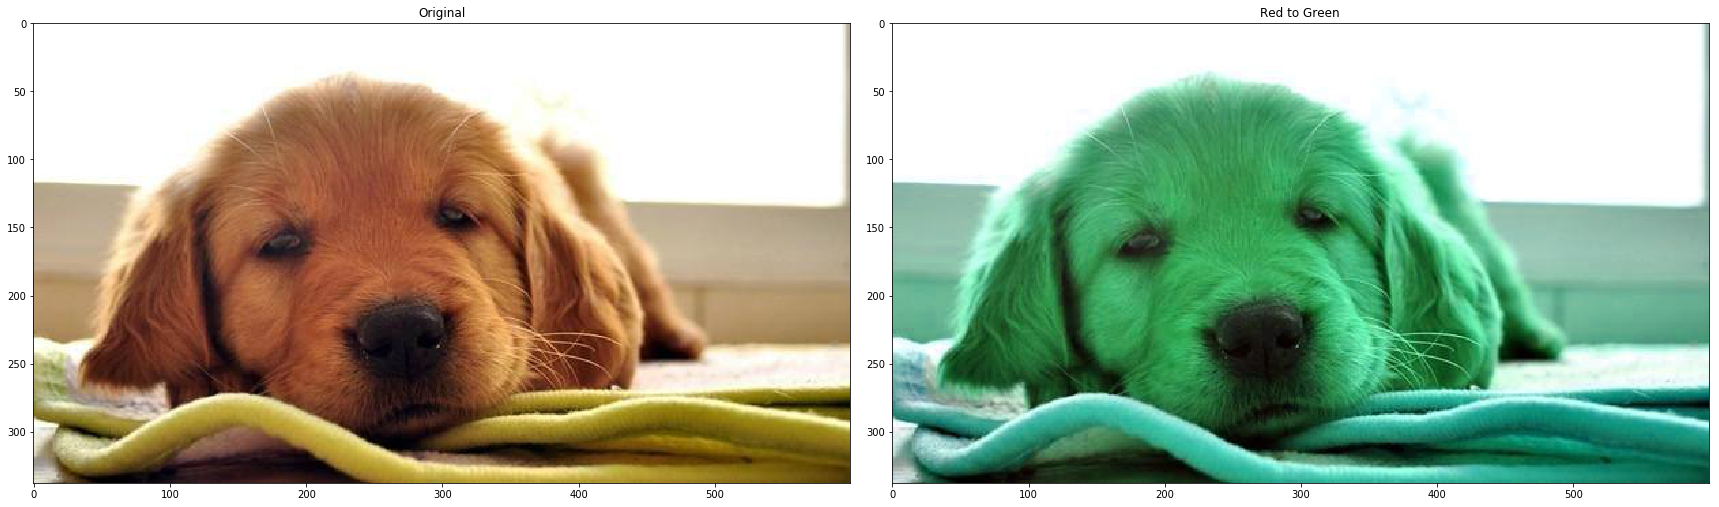

In [10]:
# Using matrix
imgrtg = img.copy() 
imgrtg[:, :, 1] = imgrtg[:, :, 2]
imgrtg[:, :, 2] = img[:, :, 1]

# Using loop
def convert_red_to_green_and_reverse(img):
    redtogreen = img.copy()
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            redtogreen[i, j, 2] = img[i, j, 1]
            redtogreen[i, j, 1] = img[i, j, 2]   
    return redtogreen

redtogreen = convert_red_to_green_and_reverse(img)

# Show result
f, axarray = plt.subplots(1, 2, figsize = (24,9))
f.tight_layout()
axarray[0].set_title('Original')
axarray[0].imshow(Original)
axarray[1].set_title('Red to Green')
axarray[1].imshow(redtogreen)
plt.show()

## Giải thích:
- Ở ảnh gốc 3.2 ta thấy ảnh có màu chủ đạo là nâu (ám đỏ red >> green), sau khi convert màu đỏ và màu xanh lá, ta có kết quả với màu chủ đạo là xanh lá (ám xanh lá green >> red).
- Thật vậy, khi lấy 1 pixel ảnh ra kiểm thử, ta có thể chứng minh. 
- VD dùng pixel có tọa độ (300, 320), chạy thử đoạn code sau:
   ![Code Demo](https://2.bp.blogspot.com/-fqEUfIhUAgk/XHTg9euIQqI/AAAAAAAACj8/vhbV0nxWVCsCxvTQb9OFbgQSfB_BSACdgCLcBGAs/s400/%257B007D3F04-F504-4DD2-8CCA-158E2746C604%257D.png.jpg)
- Ta được kết quả: chứng minh 2 kênh màu red - green tại pixel này đã được convert.
   ![Code Demon](https://1.bp.blogspot.com/-XwO1TGJAg2w/XHTi-5KFvII/AAAAAAAACkY/OEXYL0SYR7EAcVPPI-2ght3K85w8ggEcQCLcBGAs/s1600/%257BA1C489A2-046D-43CA-A088-8CE06358F2E3%257D.png.jpg)

# 6. Lật (flip) ảnh theo trục Oy (horizontally):
## Thực hiện:
- Ma trận: khởi tạo một ma trận ảnh với kích thước bằng kích thước của tấm ảnh gốc để thực hiện quá trình flip ảnh. Ta đảo mỗi hàng trên mỗi kênh màu.
- Vòng lặp for: tương tự như sử dụng ma trận, nhưng khác ở chỗ, thay đổi tuần tự giá trị trên từng pixel một.
- Sử dụng hàm cv2.flip(image, x) với x = 0 thì flip theo trục Ox,  x = 1 thì flip theo trục Oy.

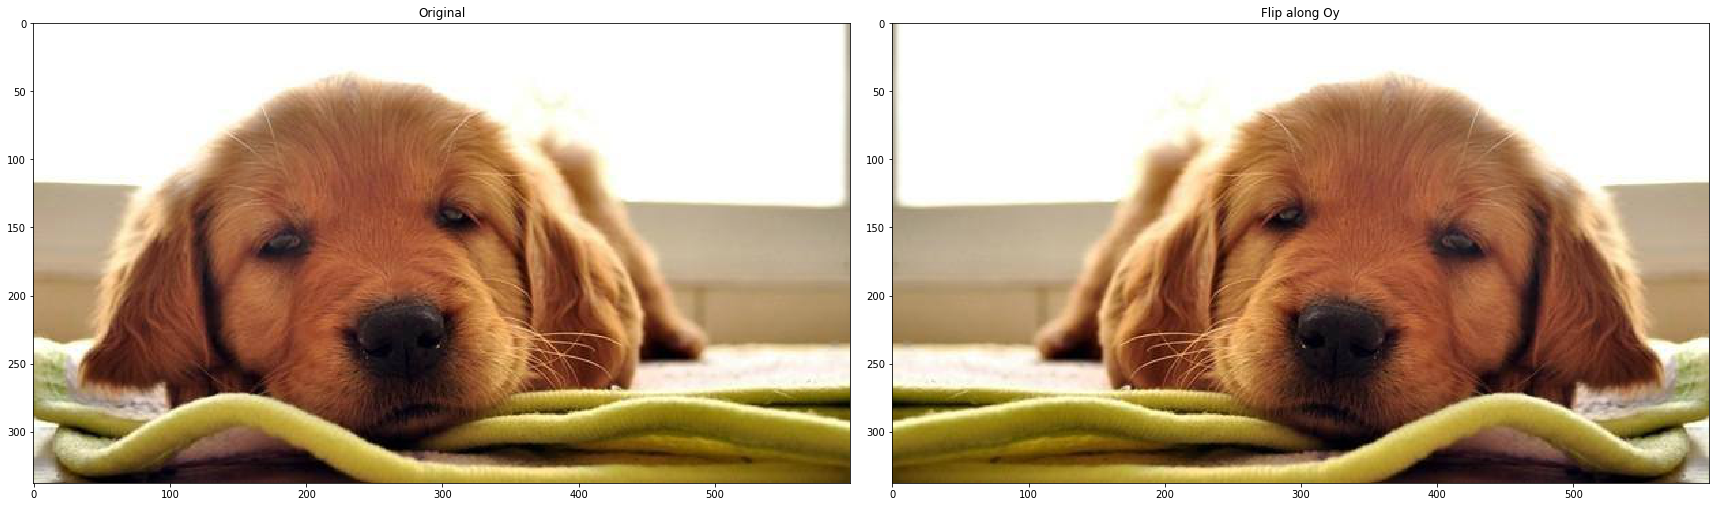

In [11]:
# Using matrix
def flip_image_horizontally(img):
    imgherizontal = np.zeros([img.shape[0], img.shape[1], 3], np.uint8)
    for j in range(img.shape[1]):
        imgherizontal[:, j] = img[:, img.shape[1] - j - 1] #y is still, change x
    return imgherizontal

# Using loop
def flip_image_horizontally_with_for(img):
    imgflipedvertically = np.zeros([img.shape[0], img.shape[1], 3], np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                imgflipedvertically[i, j, k] = img[i, img.shape[1] - j - 1, k]
    return imgflipedvertically

imgflipedvertically = flip_image_horizontally(Original)

# Show result
f, axarray = plt.subplots(1, 2, figsize = (24,9))
f.tight_layout()
axarray[0].set_title('Original')
axarray[0].imshow(Original)
axarray[1].set_title('Flip along Oy')
axarray[1].imshow(imgflipedvertically)
plt.show()

# 7. Lưu ảnh

In [12]:
cv2.imwrite("img_increase_brightness2.jpg",img_increase_brightness2)
cv2.imwrite("redis0.jpg",redis0)
cv2.imwrite("redtogreen.jpg",redtogreen)
cv2.imwrite("imgflipedvertically.jpg",imgflipedvertically)

True